# Working with feature geometries

Feature geometries can be accessed using the `geometry` property of each feature, for example:

In [1]:
import fiona

with fiona.open("data/protected_areas.gpkg") as pa:
    print(pa[54]["geometry"])

{'type': 'Polygon', 'coordinates': [[(4735594.009239462, 3078965.823412755), (4735598.939900241, 3078964.1484401985), (4735617.395840625, 3078960.836694832), (4735642.765046024, 3078963.0309132454), (4735654.509789289, 3078964.036692128), (4735683.835706008, 3078960.2905697143), (4735705.253822726, 3078953.7772551016), (4735725.275691378, 3078945.525507523), (4735758.008014588, 3078927.557614847), (4735780.156296597, 3078918.8646625024), (4735819.464290458, 3078905.284398666), (4735834.823162523, 3078901.352359455), (4735849.277172209, 3078898.9937041714), (4735884.449617594, 3078899.6116090235), (4735924.261270169, 3078904.6679478036), (4735966.552205283, 3078914.1585645718), (4735978.546694821, 3078912.4804457463), (4736006.977647917, 3078905.912987886), (4736028.670171236, 3078899.4546659617), (4736064.043938731, 3078889.4015935003), (4736064.216398902, 3078889.354525642), (4736104.026291853, 3078876.1706763958), (4736167.834506042, 3078863.264141466), (4736213.097063169, 3078859.38

## Using Shapely for geometry maninpulation   

[Shapely](http://toblerity.org/shapely/manual.html) is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium‘s Simple Features Access Specification and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems.

With Shapely, we can solve tasks like

* How big is the feature
* Do two features overlap?
* How does the common area of two features look like
* Create a buffer area around the feature
* ...

## Converting JSON to geometry objects

We first import `shapely` and it's functions and convert then the JSON-encoded geometries to Geometry objets

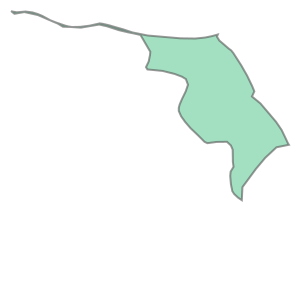

In [19]:
from shapely.geometry import shape

with fiona.open("data/protected_areas.gpkg") as pa:
    geom = shape(pa[54]["geometry"])
geom # Jupyter can display geometry data directly

In [15]:
print(geom.type)

Polygon


In [16]:
print(geom.area)

177467.44393019498


In [18]:
print(geom.length)

3377.681365863264


Let's have a look at some geometry methods

In [22]:
help(geom)

Help on Polygon in module shapely.geometry.polygon object:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coordinate pairs or triples
 |      holes :

For example we can make buffer around our polygon:

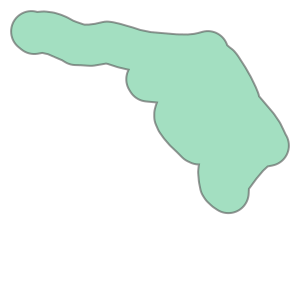

In [24]:
geom.buffer(100)

## Converting the geometry back to JSON format

Once we are finished, we can convert the geomtry back to JSON format json `shapely.geometry.mapping` function

In [ ]:
from shapely.geometry import mapping

In [26]:
# let's create new GeoJSON-encoded vector feature
import copy

new_feature = {
    "type": "Feature",
    "properties": {"name": "My buffered feature"},
    "geometry": mapping(geom.buffer(100))
}
new_feature

{'geometry': {'coordinates': (((4735531.244035573, 3078887.974012111),
    (4735523.809702216, 3078894.605262187),
    (4735517.072048652, 3078901.94330106),
    (4735511.097941236, 3078909.9153039837),
    (4735505.946668676, 3078918.4421545775),
    (4735501.669353638, 3078927.4392299973),
    (4735498.30844539, 3078936.817240756),
    (4735495.897298524, 3078946.483116858),
    (4735494.459841933, 3078956.3409314533),
    (4735494.010341338, 3078966.292852838),
    (4735494.553257708, 3078976.2401153687),
    (4735496.08320299, 3078986.0839996366),
    (4735498.5849935785, 3078995.726812187),
    (4735502.033801008, 3079005.0728550586),
    (4735506.3953983495, 3079014.029375514),
    (4735511.626499895, 3079022.5074865455),
    (4735517.675190734, 3079030.423049013),
    (4735524.481441969, 3079037.697506667),
    (4735531.977706465, 3079044.2586657605),
    (4735540.089589202, 3079050.0414115186),
    (4735548.736585591, 3079054.98835436),
    (4735557.832880429, 3079059.050399444

---
[<- Reading vector features](03_reading_vector_features.ipynb) | [Highway over protected areas ->](05_highway_over_protected_areas.ipynb)